In [1]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns,warnings

warnings.simplefilter('ignore')

In [4]:
df=pd.read_csv('gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [6]:
df.duplicated().sum()

862

In [8]:
df.shape

(3000, 3)

In [11]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(2138, 3)

In [15]:
df.isna().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

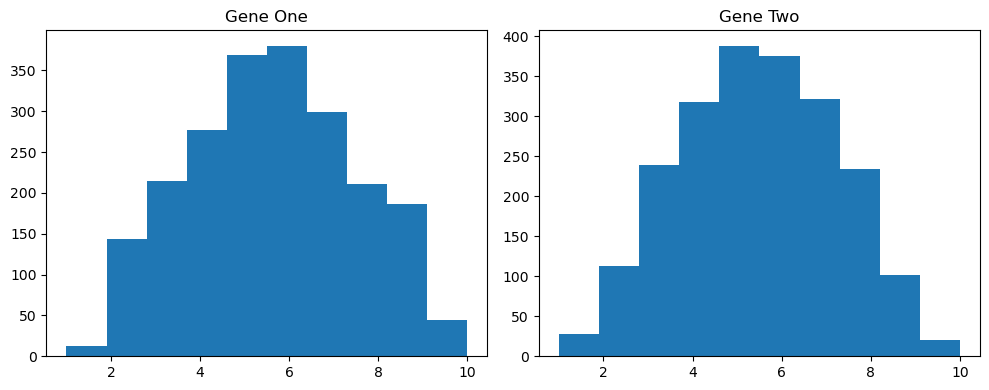

In [16]:
j=1
plt.figure(figsize=(10,4))
for i in df.iloc[:,:2]:
    plt.subplot(1,2,j)
    plt.title(i)
    plt.hist(df[i])
    j+=1
plt.tight_layout()

<Axes: xlabel='Cancer Present', ylabel='count'>

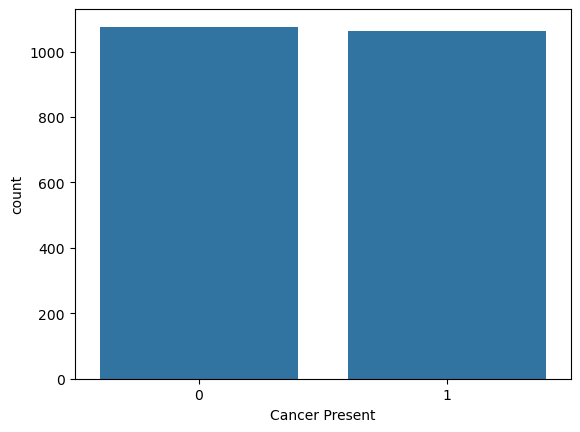

In [17]:
sns.countplot(x=df['Cancer Present'])

In [18]:
df['Cancer Present'].value_counts()

Cancer Present
0    1076
1    1062
Name: count, dtype: int64

<Axes: xlabel='Gene One', ylabel='Gene Two'>

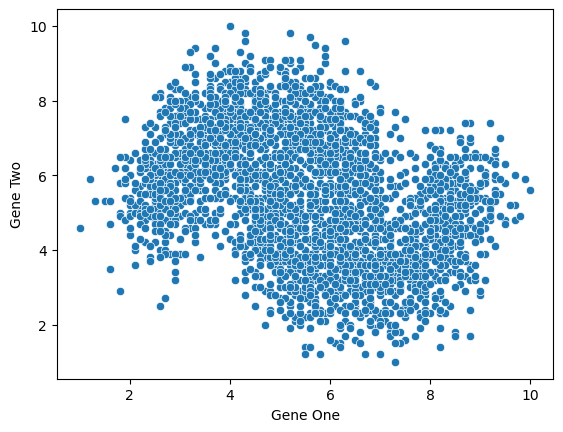

In [19]:
sns.scatterplot(x='Gene One',y='Gene Two',data=df)

In [20]:
df.corr()

,Gene One,Gene Two,Cancer Present
Gene One,1.000000,-0.341952,0.534585
Gene Two,-0.341952,1.000000,-0.655172
Cancer Present,0.534585,-0.655172,1.000000


<Axes: >

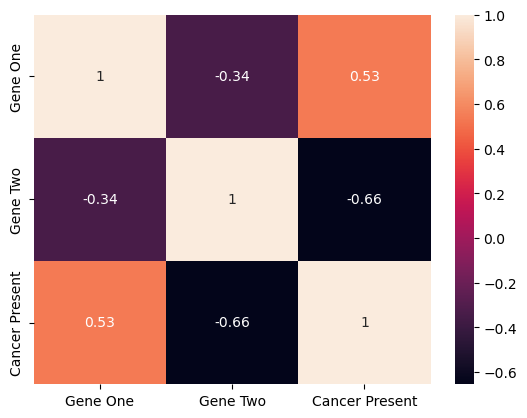

In [21]:
sns.heatmap(df.corr(),annot=True)

In [23]:
df['Cancer Present']=df['Cancer Present'].map({0:'No',1:'Yes'})

In [24]:
df.head(10)

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,Yes
1,2.5,6.3,No
2,5.7,3.9,Yes
3,6.1,6.2,No
4,7.4,3.4,Yes
5,3.4,7.5,No
6,3.1,6.8,No
7,6.3,4.9,Yes
8,5.5,8.6,No
9,7.7,3.5,Yes


In [25]:
x=df.drop('Cancer Present',axis=1)
y=df['Cancer Present']

In [26]:
x

,Gene One,Gene Two
0,4.3,3.9
1,2.5,6.3
2,5.7,3.9
3,6.1,6.2
4,7.4,3.4
...,...,...
2995,5.0,6.5
2996,3.4,6.6
2997,2.7,6.5
2998,3.3,5.6


In [27]:
from sklearn.model_selection import train_test_split as tts,cross_val_score as cs
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=45)

In [28]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(x_train,y_train)

SVC()

In [31]:
y_train_pred=svm_model.predict(x_train)
y_test_pred=svm_model.predict(x_test)

In [32]:
df1=pd.DataFrame({'Actual':y_test,'Predictions':y_test_pred})
df1.head(10)

,Actual,Predictions
318,Yes,Yes
2291,Yes,No
411,No,No
975,Yes,Yes
302,No,No
721,Yes,Yes
349,No,No
1959,Yes,Yes
564,No,No
2039,Yes,No


In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
print('Train accuracy:',accuracy_score(y_train,y_train_pred))
print('Test accuracy:',accuracy_score(y_test,y_test_pred))

Train accuracy: 0.9134502923976608
Test accuracy: 0.9205607476635514


In [35]:
print('Confusion matrix Testing data :\n',confusion_matrix(y_test,y_test_pred))
print('Confusion matrix trainig data :\n',confusion_matrix(y_train,y_train_pred))
print('Confusion matrix trainig data :\n',confusion_matrix(y_train,y_train_pred))
print('Classification report traning data:\n',classification_report(y_train,y_train_pred))

Confusion matrix Testing data :
 [[206  15]
 [ 19 188]]
Confusion matrix trainig data :
 [[773  82]
 [ 66 789]]
Confusion matrix trainig data :
 [[773  82]
 [ 66 789]]
Classification report traning data:
               precision    recall  f1-score   support

          No       0.92      0.90      0.91       855
         Yes       0.91      0.92      0.91       855

    accuracy                           0.91      1710
   macro avg       0.91      0.91      0.91      1710
weighted avg       0.91      0.91      0.91      1710



In [37]:
from sklearn.model_selection import GridSearchCV
parameters={'C':[0,0.01,0.1,1,5,10,15,20,50,100],"kernel":['linear','rbf','sigmod','poly']}
grid_search=GridSearchCV(svm_model,parameters,cv=5)
grid_search.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0, 0.01, 0.1, 1, 5, 10, 15, 20, 50, 100],
                         'kernel': ['linear', 'rbf', 'sigmod', 'poly']})

In [38]:
grid_search.best_params_

{'C': 1, 'kernel': 'rbf'}

In [40]:
import time
start_time=time.time()
svm_grid_model=SVC(C=0.001,kernel='linear')
svm_model.fit(x_train,y_train)
end_time=time.time()
time_diff=end_time-start_time
print('Excution time',time_diff)

Excution time 0.052791595458984375


In [41]:
svm_model.fit(x_train,y_train)
y_train_pred=svm_model.predict(x_train)
y_test_pred=svm_model.predict(x_test)
print('Train accuracy:',accuracy_score(y_train,y_train_pred))
print('Test accuracy:',accuracy_score(y_test,y_test_pred))
print('Cross validation Score:',cross_val_score(svm_model,x,y,cv=5).mean())

Train accuracy: 0.9134502923976608
Test accuracy: 0.9205607476635514
Cross validation Score: 0.9143918667512969


## KNN model 

In [43]:
from sklearn.neighbors import KNeighborsClassifier
start_time=time.time()
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)
end_time=time.time()
time_diff=end_time-start_time
print('Excution time',time_diff)

Excution time 0.008863449096679688


In [44]:
y_train_pred=knn_model.predict(x_train)
y_test_pred=knn_model.predict(x_test)
print('Train accuracy:',accuracy_score(y_train,y_train_pred))
print('Test accuracy:',accuracy_score(y_test,y_test_pred))
print('Cross validation Score:',cross_val_score(knn_model,x,y,cv=5).mean())

Train accuracy: 0.9239766081871345
Test accuracy: 0.9158878504672897
Cross validation Score: 0.9050373175162513


In [45]:
start_time=time.time()
y_train_pred=svm_model.predict(x_train)
y_test_pred=svm_model.predict(x_test)
end_time=time.time()
time_diff=end_time-start_time
print('Excution time',time_diff)
print('Train accuracy:',accuracy_score(y_train,y_train_pred))
print('Test accuracy:',accuracy_score(y_test,y_test_pred))
print('Cross validation Score:',cross_val_score(svm_model,x,y,cv=5).mean())

Excution time 0.11330986022949219
Train accuracy: 0.9134502923976608
Test accuracy: 0.9205607476635514
Cross validation Score: 0.9143918667512969
